In [28]:
import numpy as np
import pandas as pd

# for plotting
import matplotlib.pyplot as plt

# for Q-Q plots
import scipy.stats as stats

# the dataset for the demo
from sklearn.datasets import load_boston

# with open-source packages
from sklearn.preprocessing import FunctionTransformer
from feature_engine import transformation as vt

In [6]:
##read the file
data=pd.read_csv("D:/INEURON_DATA/Dataset/data1/cleaned_travel.csv")
data

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0


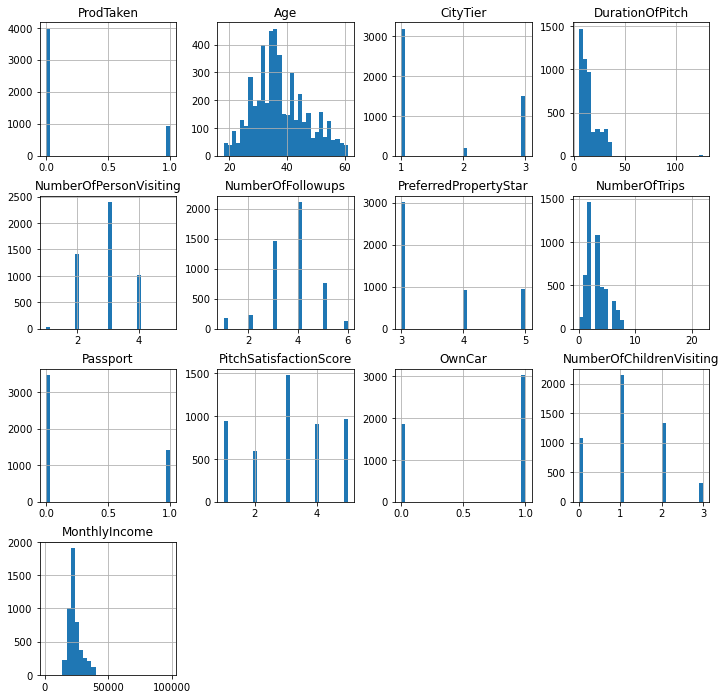

In [8]:
# plot the histogram to inspect variable distributions (not in book)

data.hist(bins=30, figsize=(12,12))
plt.show()

In [9]:
# plot histogram and Q-Q plots to have a look at the variable distribution

def diagnostic_plots(df, variable):
    
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)

    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)

    plt.show()

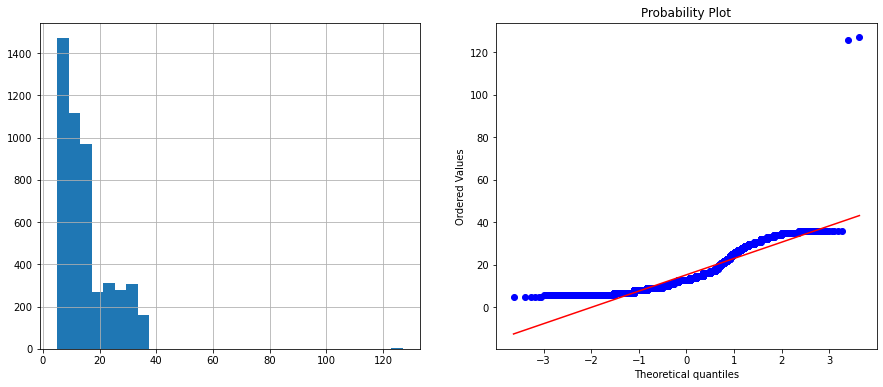

In [10]:
# check original distribution

diagnostic_plots(data, 'DurationOfPitch')

# Logarithmic transformation with NumPy

In [11]:
# make a copy of the dataframe where we will store the modified
# variables

data_tf = data.copy()

In [13]:
# apply log to a set of variables
data_tf[['CityTier', 'Age', 'NumberOfFollowups', 'MonthlyIncome']] = np.log(
    data[['CityTier', 'Age', 'NumberOfFollowups', 'MonthlyIncome']])

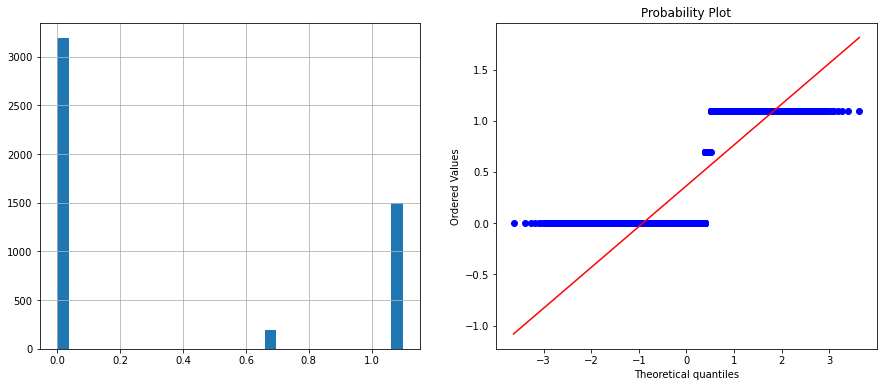

In [14]:
# use diagnostic plot function to address variable transformation

diagnostic_plots(data_tf, 'CityTier')

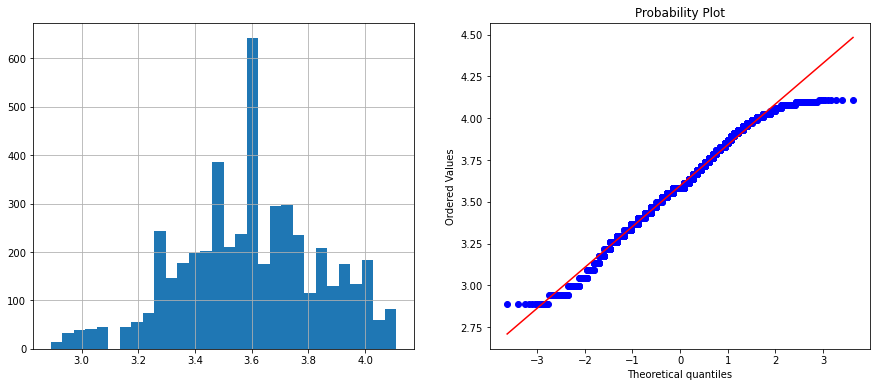

In [15]:
# use diagnostic plot function to address variable transformation

diagnostic_plots(data_tf, 'Age')

 # reciprocal-transformation

In [16]:
# make a copy of the dataframe where we will store the modified
# variables

data_tf = data.copy()

In [18]:
# apply the reciprocal to a set of variables

data_tf[['CityTier', 'Age', 'NumberOfFollowups', 'MonthlyIncome']] = np.reciprocal(data[['CityTier', 'Age', 'NumberOfFollowups', 'MonthlyIncome']])

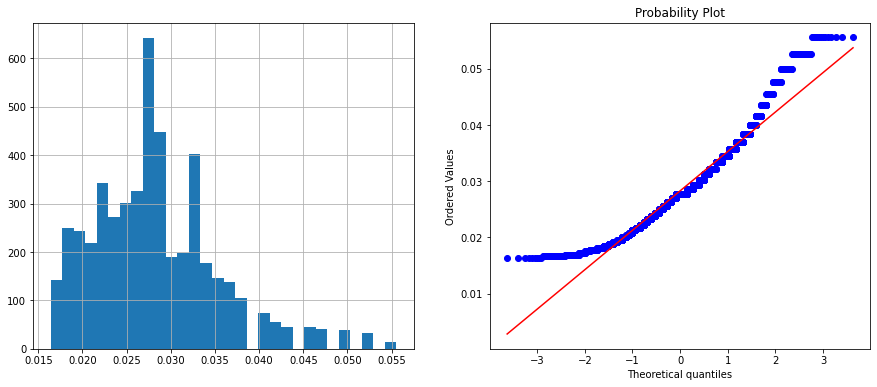

In [19]:
# use diagnostic plot function to address variable transformation

diagnostic_plots(data_tf, 'Age')

 # square-cube-root

In [23]:
# apply the square root transformation to a set of variables
data_tf[['CityTier', 'Age', 'NumberOfFollowups', 'MonthlyIncome']] = np.sqrt(data[['CityTier', 'Age', 'NumberOfFollowups', 'MonthlyIncome']])

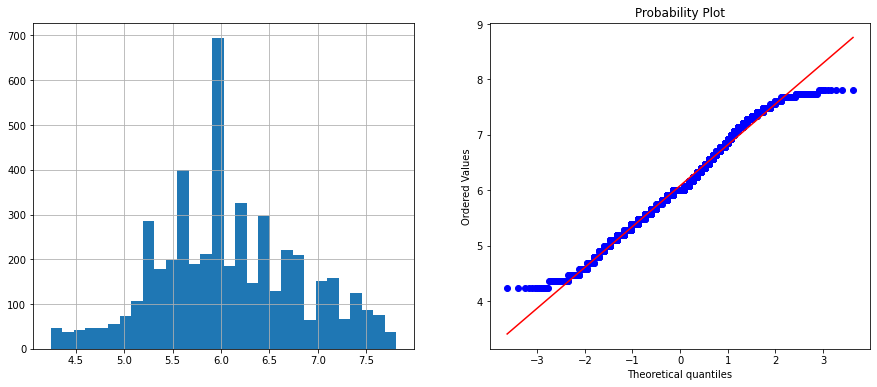

In [21]:
# use diagnostic plot function to address variable transformation

diagnostic_plots(data_tf, 'Age')

# PowerTransformer

In [29]:
# set up PowerTransformer with the square root exponent
et = vt.PowerTransformer(variables = ['CityTier', 'Age', 'NumberOfFollowups', 'MonthlyIncome'], exp=1/3) # for cube root

# fit transformer to data 
et.fit(data)

PowerTransformer(exp=0.3333333333333333,
                 variables=['CityTier', 'Age', 'NumberOfFollowups',
                            'MonthlyIncome'])

In [30]:
# transform indicated variables within our dataframe
data_tf = et.transform(data)

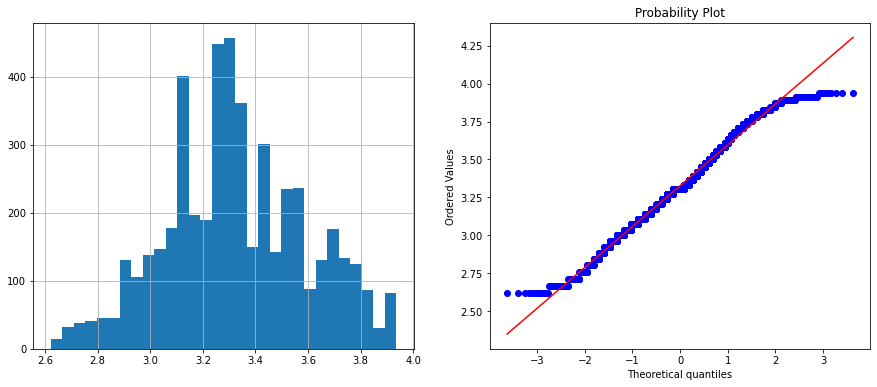

In [31]:
# visualize the trasnformation

diagnostic_plots(data_tf, 'Age')

#  We can also apply different power transformations to different set of features using Feature-engine 

In [32]:
from sklearn.pipeline import Pipeline

In [34]:
pipe = Pipeline([
    ('power1', vt.PowerTransformer(variables = ['Age', 'CityTier'], exp=0.3)),    
    ('power2', vt.PowerTransformer(variables = ['NumberOfFollowups'], exp=0.4)),
    ('power3', vt.PowerTransformer(variables = ['MonthlyIncome'], exp=0.5)),
     ])

In [35]:
pipe.fit(data)

Pipeline(steps=[('power1',
                 PowerTransformer(exp=0.3, variables=['Age', 'CityTier'])),
                ('power2',
                 PowerTransformer(exp=0.4, variables=['NumberOfFollowups'])),
                ('power3', PowerTransformer(variables=['MonthlyIncome']))])

In [37]:
data_tf = pipe.transform(data)

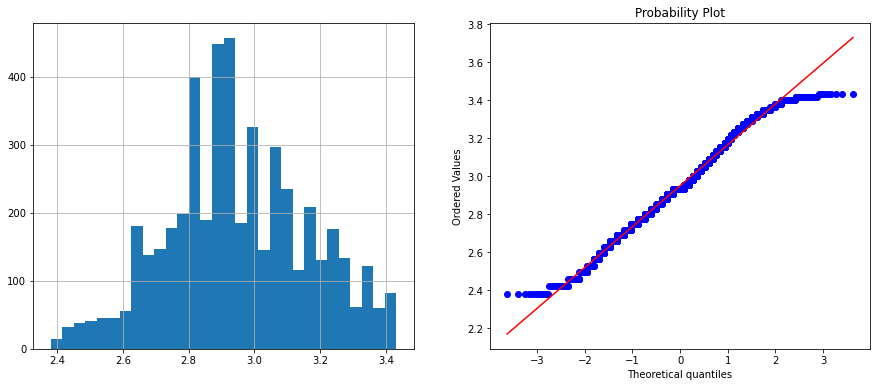

In [40]:
# plot transform variable
diagnostic_plots(data_tf, 'Age')

# BoxCoxTransformation

In [42]:
# initialize the transformer with a group of variables to transform
bct = vt.BoxCoxTransformer(variables = ['CityTier', 'Age', 'NumberOfFollowups', 'MonthlyIncome'])

# fit transformer to the data set
bct.fit(data)

BoxCoxTransformer(variables=['CityTier', 'Age', 'NumberOfFollowups',
                             'MonthlyIncome'])

In [43]:
# transform the indicated variables in our dataframe
# returns a new dataframe

data_tf = bct.transform(data)

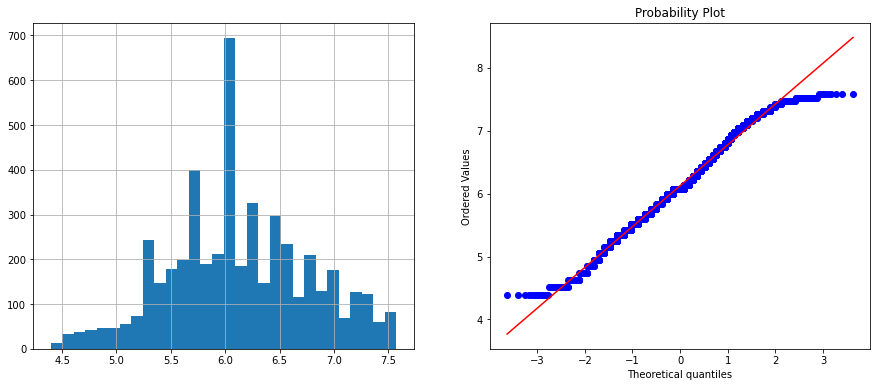

In [44]:
# plot transform variable
diagnostic_plots(data_tf, 'Age')

In [45]:
# the transformer stores the optimal parameter for each 
# variable in a dictionary in its attribute lambda_dict_

bct.lambda_dict_

{'CityTier': -1.875948386300512,
 'Age': 0.2721701743788588,
 'NumberOfFollowups': 1.353890409047392,
 'MonthlyIncome': 0.03004235634267833}

  # YeoJohnsonTransformer

In [51]:
# make a copy of the dataframe where we will store the modified
# variables

data_tf = data.copy()

In [52]:
# initialize the transformer with a subset of variables to transform
yjt = vt.YeoJohnsonTransformer(variables = ['CityTier', 'Age', 'NumberOfFollowups', 'MonthlyIncome'])

# fit transformer to the dataframe
yjt.fit(data)

YeoJohnsonTransformer(variables=['CityTier', 'Age', 'NumberOfFollowups',
                                 'MonthlyIncome'])

In [53]:
# transform indicated variables

data_tf = yjt.transform(data)

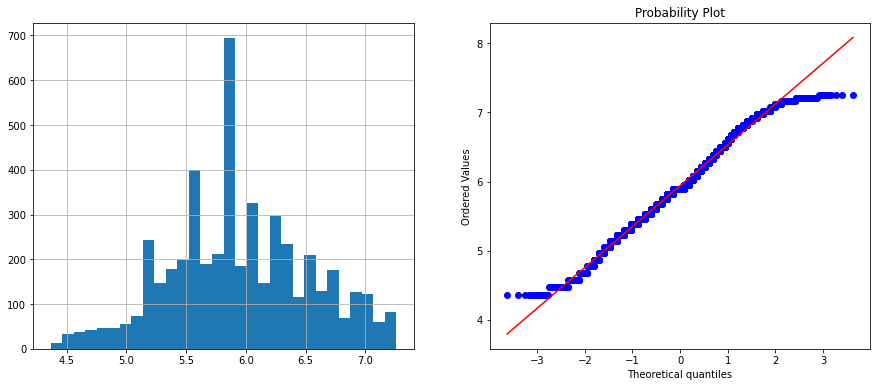

In [54]:
# plot transform variable
diagnostic_plots(data_tf, 'Age')

In [55]:
# the transformer stores the learned parameters for each variable
# in a dictionary as an attribute

yjt.lambda_dict_

{'CityTier': -3.006079495707188,
 'Age': 0.2520030380092679,
 'NumberOfFollowups': 1.4853333937911615,
 'MonthlyIncome': 0.02988112239083879}

Using different transformation techniques, the result of variable "Age" looks same, but it is different in every case. Only minor difference is there